# E3.A a)- Task

In [22]:
reset -f

In [23]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [24]:
L, F, x  = sp.symbols('L, F, x', real = 'True')
Ax, Ay, MAz = sp. symbols('Ax, Ay, MAz', real = 'True')

In [25]:
eq1 = sp.Eq(0 , Ax)
eq2 = sp.Eq(0 , Ay - F)
eq3 = sp.Eq(0, MAz - F*L)

In [26]:
sol = sp.solve([eq1, eq2, eq3],[Ax, Ay, MAz])
sol

{Ax: 0, Ay: F, MAz: F*L}

In [27]:
Ax, Ay, MAz = sol.values()

# Internal force reactions

## Define symbolic functions

In [28]:
N = sp.Function('N')(x)
Q = sp.Function('Q')(x)
Mbz = sp.Function('Mbz')(x) 

## Set up equations

In [29]:
eq11 = sp.Eq(0, N + Ax) 
eq12 = sp.Eq(0, Q + Ay)
eq13 = sp.Eq(0, Mbz + MAz - Ay*x)

# solve equations

In [30]:
sol = sp.solve([eq11, eq12, eq13],[N, Q, Mbz])
sol

{N(x): 0, Q(x): -F, Mbz(x): -F*L + F*x}

In [31]:
N, Q, Mbz = sol.values()

# Stress

In [32]:
E, h, b, y = sp.symbols('E, h, b,y', real = 'True')

In [33]:
Iz = b*h**3/12

In [34]:
sigma = -Mbz/Iz * y
display(sigma.subs([(x,0),(y,h/2)]))

6*F*L/(b*h**2)

# Deformation

In [35]:
v = sp.Function('v')

In [36]:
eq = sp.Eq(sp.diff(v(x),x,x), Mbz/(E*Iz))
display(eq)

Eq(Derivative(v(x), (x, 2)), 12*(-F*L + F*x)/(E*b*h**3))

In [37]:
bc = {v(0):0, sp.diff(v(x),x).subs(x, 0):0}

In [38]:
sol = sp.dsolve(eq, ics = bc)
v = sol.rhs
display(sol)
display(sol.subs(x,L))

Eq(v(x), -6*F*L*x**2/(E*b*h**3) + 2*F*x**3/(E*b*h**3))

Eq(v(L), -4*F*L**3/(E*b*h**3))

In [39]:
v = v.subs([(L, 100), (h, 2), (b, 15), (E, 210000)])

In [40]:
v_fun = sp.lambdify((x ,F), v, 'numpy')
s = np.arange(0,100,1)


Text(0, 0.5, 'v(x)')

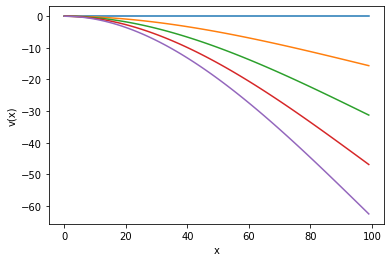

In [41]:
plt.plot(s, v_fun(s,0))
plt.plot(s, v_fun(s,100))
plt.plot(s, v_fun(s,200))
plt.plot(s, v_fun(s,300))
plt.plot(s, v_fun(s,400))
plt.xlabel('x')
plt.ylabel('v(x)')